----------------------------------------Türlere Göre Ortalama Puanlar---------------------------
- Anime/Science fiction 6.366666666666667
- Sports film 6.366666666666667
- Drama 6.366666666666667
- Historical drama 6.366666666666667
- Dark comedy 6.366666666666667
- Romantic teen drama 6.366666666666667
- Science fiction 6.366666666666667
- Animation/Christmas/Comedy/Adventure 6.366666666666667
- Drama/Horror 6.366666666666667
- Animation/Musical/Adventure 6.366666666666667
- Historical-epic 6.366666666666667
- Family 6.366666666666667
- Making-of 6.366666666666667
- Action comedy 6.366666666666667
- Adventure-romance 6.366666666666667
- Action-thriller 6.366666666666667
- Science fiction thriller 6.366666666666667
- Superhero/Action 6.366666666666667
- Animation/Comedy/Adventure 6.366666666666667
- Drama-Comedy 6.366666666666667
- Adventure 6.366666666666667
- Drama / Short 6.366666666666667
- Romantic comedy 6.366666666666667
- Animation / Short 6.366666666666667
- Thriller 6.366666

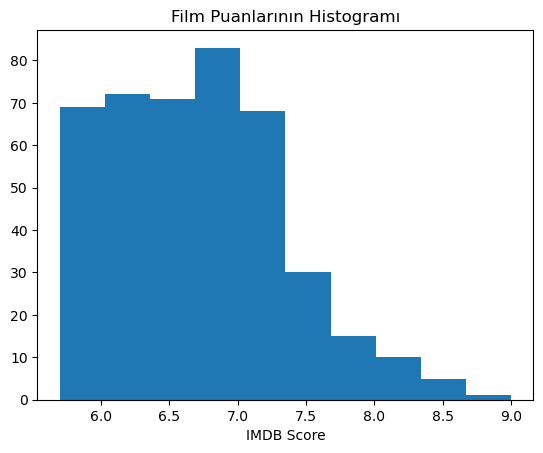

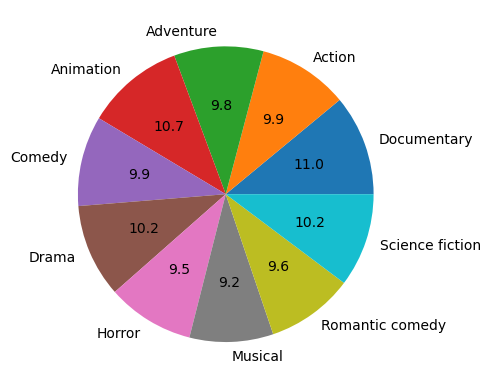

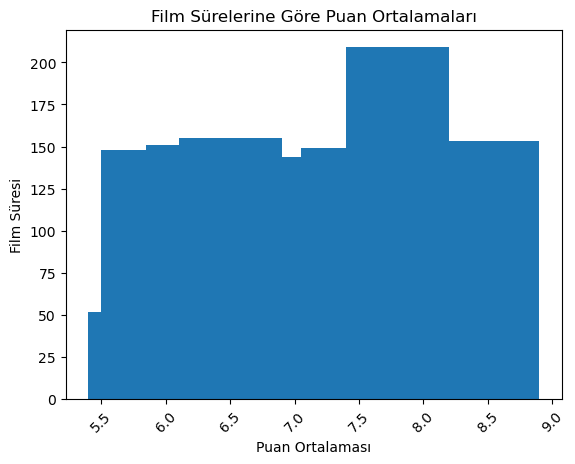

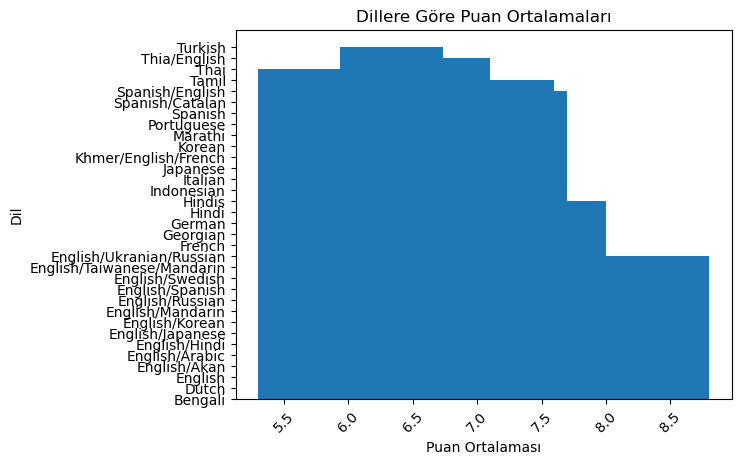

Film İncelemeleri Analizi Sonuçları:
|||-------------------------------------|||
Ortalama Puan: 6.703537735849056
En Yüksek Puan: 9.0
En Düşük Puan: 5.7
Standart Sapma: 0.6384539048698509
----------------------------------------------------------------------------------------------------
Ortalama Süre: 93.82075471698113
En yüksek süre: 209
En düşük süre: 7
Standart sapma: 29.161666333620325


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Aşama 1: Veri Hazırlığı

# Veri setini yükleme
data = pd.read_csv('netflix.csv')

# Veri setini DataFrame'e dönüştürme
df = pd.DataFrame(data)

# Veri setini temizleme (örneğin, eksik verileri doldurma veya gereksiz sütunları kaldırma)

list_genre = df['Genre']
genres = list(set(list_genre))
main_genres = ['Documentary', 'Action', 'Adventure', 'Animation', 'Comedy', 'Drama', 'Horror', 'Musical', 'Romantic comedy', 'Science fiction']

# Aşama 2: Veri Keşfi

# Veri setini keşfetme
summary = df.describe()  # İstatistiksel özetlemeler
genreCounts = df['Genre'].value_counts()  # Türlere göre film içerik sayıları 
genreAvgRating = df.groupby('Genre')['IMDB Score'].mean()#Türlere göre puan ortalamaları
genreAvgRatingMain = genreAvgRating.reindex(main_genres)# Ana türlere göre puan ortalamaları
languageAvgRating = df.groupby('Language')['IMDB Score'].mean() # Dillere göre puan ortalamaları
runtimeAvgRating = df.groupby('Runtime')['IMDB Score'].mean() # Sürelere göre puan ortalamaları

# En yüksek puan alan filmler
# 'IMDB SCore' sütununu kullanarak verileri puanlarına göre sıralama
df_sorted = df.sort_values('IMDB Score', ascending=False)
# En yüksek puan almış ilk 20 filmi seçiyoruz
top20 = df_sorted.head(20) 

# Dillere göre çıkarılan film sayıları
top_languanges = df['Language'].value_counts()

# Aşama 3: Veri Analizi

#Film Sürelerine göre istatistiksel analizler

mean_runtime = df['Runtime'].mean() # Ortalama süre
max_runtime = df['Runtime'].max() # En yüksek süre
min_runtime = df['Runtime'].min() # En düşük süre
std_runtime = df['Runtime'].std() # Standart sapma

# Film puanlarına göre istatistiksel analizler
mean_rating = df['IMDB Score'].mean()  # Ortalama puan
max_rating = df['IMDB Score'].max()  # En yüksek puan
min_rating = df['IMDB Score'].min()  # En düşük puan
std_rating = df['IMDB Score'].std()  # Standart sapma

# Türlere göre ortalama puanlar

print("----------------------------------------Türlere Göre Ortalama Puanlar---------------------------")

for i in genreAvgRating:
    for j in genres:
        print(f"- {j} {i}")


# Aşama 4: Veri Görselleştirme

# Puan dağılımı için histogram
plt.hist(df['IMDB Score'], bins=10)
plt.xlabel('IMDB Score')
plt.title('Film Puanlarının Histogramı')
plt.show()

# Ana Türlere göre puan ortalamaları için grafik
plt.pie(genreAvgRatingMain, labels = main_genres, autopct = '%1.1f')
plt.show()

# Türlerin puan ortalamalarını karşılaştırmak için çubuk grafikler
plt.bar(runtimeAvgRating.values, runtimeAvgRating.index)
plt.xlabel('Puan Ortalaması')
plt.ylabel('Film Süresi')
plt.title('Film Sürelerine Göre Puan Ortalamaları')
plt.xticks(rotation=45)
plt.show()

# Dillerin puan ortalamalarını karşılaştırmak için çubuk grafikler
plt.bar(languageAvgRating.values, languageAvgRating.index)
plt.xlabel('Puan Ortalaması')
plt.ylabel('Dil')
plt.title('Dillere Göre Puan Ortalamaları')
plt.xticks(rotation=45)
plt.show()

# Aşama 5: Sonuçlar ve Öneriler

# Analiz sonuçlarını özetleme ve görselleri sunma
print('Film İncelemeleri Analizi Sonuçları:')
print('|||-------------------------------------|||')
print('Ortalama Puan:', mean_rating)
print('En Yüksek Puan:', max_rating)
print('En Düşük Puan:', min_rating)
print('Standart Sapma:', std_rating)
print('----------------------------------------------------------------------------------------------------')
print('Ortalama Süre:', mean_runtime) # Ortalama süre
print('En yüksek süre:', max_runtime) # En yüksek süre
print('En düşük süre:', min_runtime)# En düşük süre
print('Standart sapma:', std_runtime)# Standart sapma